# NB02 - Data Analysis
**Author:** Thea West

**Description:**
...

## TODO: remove all loops

In [18]:
%config InlineBackend.figure_formats = ['svg']

import requests
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

from IPython.display import Image

First load the data from the CSV:

In [19]:
df = pd.read_csv("data/rain_data_2024.csv")
df['time'] = pd.to_datetime(df['time'], format='ISO8601') # convert to datetime format again
df

,time,rain_sum,precipitation_hours,city,rainy_day
0,2024-01-01,8.3,8.0,London,True
1,2024-01-02,9.6,11.0,London,True
2,2024-01-03,2.3,6.0,London,True
3,2024-01-04,27.7,8.0,London,True
4,2024-01-05,4.6,8.0,London,True
...,...,...,...,...,...
1825,2024-12-27,0.0,0.0,Dublin,False
1826,2024-12-28,0.0,0.0,Dublin,False
1827,2024-12-29,0.0,0.0,Dublin,False
1828,2024-12-30,0.0,0.0,Dublin,False


Let's start by viewing the number of rainy days in 2024 by city:

### TODO: explain reset_index

In [20]:
total_rainy_days = df.groupby('city')['rainy_day'].sum().reset_index(name = 'num_days')
total_rainy_days

,city,num_days
0,Amsterdam,192
1,Brussels,197
2,Dublin,207
3,London,163
4,Paris,189


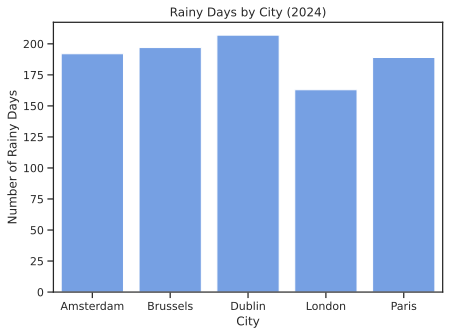

In [21]:
my_color = ["#649cf5"]
sns.set_theme(
    style="ticks",
    palette = my_color
)
sns.barplot(x=list(total_rainy_days['city']), y=list(total_rainy_days['num_days']))

plt.xlabel("City")
plt.ylabel("Number of Rainy Days")
plt.title("Rainy Days by City (2024)")

plt.tight_layout()

According to this definition of a "rainy day" London actually had the fewest rainy days of all five cities in 2024! Maybe London just has a lot of days with very little rain. For example, if it rained just a tiny bit for a few minutes, even if this happened every hour, it might not qualify as a rainy day. How do the number of days with any rain (more than 0mm) compare among these cities?

In [22]:
df['any_rain'] = df['rain_sum'] > 0
total_days_with_rain = df.groupby('city')['any_rain'].sum().reset_index(name = 'any_rain_days')

total_days_with_rain

,city,any_rain_days
0,Amsterdam,258
1,Brussels,265
2,Dublin,282
3,London,239
4,Paris,241


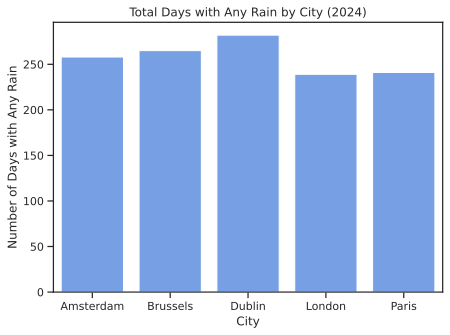

In [23]:
my_color = ["#649cf5"]
sns.set_theme(
    style="ticks",
    palette = my_color
)
sns.barplot(x=list(total_days_with_rain['city']), y=list(total_days_with_rain['any_rain_days']))

plt.xlabel("City")
plt.ylabel("Number of Days with Any Rain")
plt.title("Total Days with Any Rain by City (2024)")


plt.tight_layout()

London still has the fewest days with rain (although Paris is very close). Perhaps the stereotype comes from London being rainier in a particular season. It might be more noticable if the summer months are very rainy as it ruins the nice warm weather. In the winter it's cold outside anyway so people might not mind the rain so much. Let's look at how rainy each city was in each month of 2024.

First create a dataframe containing monthly rainy day counts for each city:

In [ ]:
# add a column for month (3-letter abreviations so x-axis doesn't get too cluttered)
df = df.assign(month = df['time'].dt.month_name().str.slice(stop=3))

# set the month order so it doesn't default to alphabetical
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered=True)

# set the city order so London is last (the line will be on top of all others, creates more emphasis)
city_order = ['Amsterdam', 'Brussels', 'Dublin', 'Paris', 'London']
df['city'] = pd.Categorical(df['city'], categories = city_order, ordered=True)

# create a new df with city, month, and rainy day count columns
monthly_counts = (df.groupby(['city','month'])['rainy_day'].sum().reset_index(name='rainy_days'))

/tmp/ipykernel_311/2798549746.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = (df.groupby(['city','month'])['rainy_day'].sum().reset_index(name='rainy_days'))


Create and display line graph:

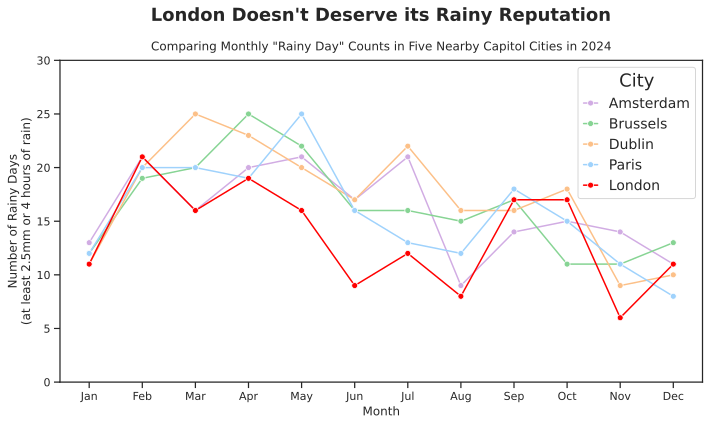

In [68]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))

# set a color for each city
my_palette = {
    "London":    "#ff0000",   # brightest red
    "Paris":     "#9fd2fc",   # light blue
    "Dublin":    "#fcc088",   # light orange
    "Brussels":  "#87d494",   # light green
    "Amsterdam": "#d1ace3",   # light purple
}

# create the lineplot
sns.lineplot(
    data = monthly_counts,
    x = 'month',
    y = 'rainy_days',
    hue = 'city',
    marker = 'o',
    palette=my_palette,
    ax = ax
)

# customize location and size of legend
ax.legend(
    title="City",
    loc='upper right',
    fontsize='14',
    title_fontsize='18',
    handlelength=1.0,
)

# customize the tick interval (by fives, with space at the top)
max_days = monthly_counts['rainy_days'].max()
ticks = list(range(0, int(max_days) + 6, 5))
ax.set_yticks(ticks)

# subtitle
# centered on the box of the graph
ax.set_title(
    "Comparing Monthly \"Rainy Day\" Counts in Five Nearby Capitol Cities in 2024",
    fontsize=12,
    pad=10  # space below the subtitle
)

# title
# centered to entire page
fig.suptitle(
    "        London Doesn't Deserve its Rainy Reputation", 
    fontsize=18,
    fontweight='bold',
)
# --------

# set the labels and show the plot
ax.set_xlabel("Month")
ax.set_ylabel("Number of Rainy Days\n(at least 2.5mm or 4 hours of rain)")
plt.tight_layout()
plt.show()

There was no month in which London had the most rainy days. It tied with Amsterdam for the most rainy days in February but otherwise there was at least one city each month with more rainy days. London had noticably fewer rainy days in May through August than the other cities.

---

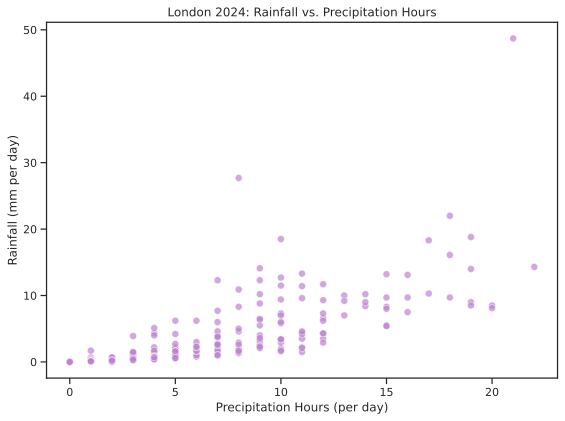

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter your raw daily points
sns.scatterplot(
    data=london_df,
    x="precipitation_hours",
    y="rain_sum",
    s=50,                # size of each point
    alpha=0.7,           # make them a bit transparent
    edgecolor="w",       # white border around each dot
    ax=ax
)

# 5) Overlay a best‐fit line (no new points)
#sns.regplot(
#    data=london_df,
#    x="precipitation_hours",
#    y="rain_sum",
#    scatter=False,       # don’t re‐draw the scatter
#    ax=ax,
#    line_kws={"linestyle":"--", "linewidth":1}
#)

# Labels and title
ax.set_xlabel("Precipitation Hours (per day)")
ax.set_ylabel("Rainfall (mm per day)")
ax.set_title("London 2024: Rainfall vs. Precipitation Hours")

# Tidy up and show
plt.tight_layout()
plt.show()


to do:
- above graph for each city
    - clean up (and better understand) above code
    - zoom in on under 10 mm on this graph
- days in each city where it rained at all (rainfall mm > 0)
- rainy days per city per month (line graph, each city is diff color line)